In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import EEGAnalysis as ea
import numpy as np

In [3]:
datacontainer_split = ea.container.SplitDataContainer(
    sgchdir="../../Data/Chen Zhou/EEG/SgCh",  # SgCh文件夹所在的路径
    chidx=98,  # 目标的channel号（从0记）
    fs=2000,   # 采样频率
    markername = "grating",  # marker name, either be "grating" or "entrain"
    marker_bias = "marker_bias.csv",  # 你整理的不同文件marker的bias csv文件，
                                      # 把csv文件放在SgCh文件夹里，这里写上csv文件的文件名（包括后缀名）
                                      # if there is no such file, skip this argument or input None.
    _import_date = ["180831", "180901"],  # explicitly import data from certain date
                                          # to import all date, set _import_date to "all"
    _roi_head = -2                    # the roi range would be (_roi_head, ITI);
                                      # specially, for "grating", _roi_head should be larger than -3 
)

# check the ch_erp shape to validate the result.
# for each date, each mode, there would be 20 grating trials, 
# and less than 2 entrain trials (few may only have
# one or none entrain trials).

# NOTE: ch_erp now has concatenated tials of each different paradigms
# 5: for all three paradigms
# 5-1, 5-2, 5-3 for each paradigm respectively
# the same for 10, 10-1, 10-2, 10-3

selection = "10"
tspec = np.linspace(-2, 10, (10+2)*2000)  #NOTE: roi specification, used by blocks below

np.shape(datacontainer_split.ch_erp[selection])

(100, 24000)

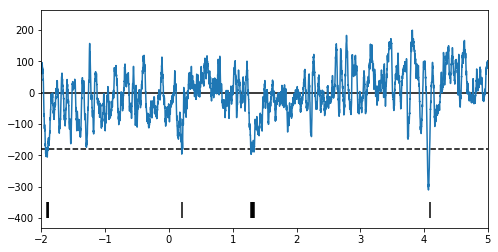

In [32]:
eg = datacontainer_split.ch_erp[selection][1,:]
event = ea.detect_thresh(eg, -180, gap=1, datadown=False)
plt.figure(figsize=(8,4))
plt.plot(tspec, eg)
plt.hlines(0, -5, 5)
plt.hlines(-180, -5, 5, linestyle='--')
plt.vlines(tspec[event], -400, -350)
plt.xlim([-2, 5])
plt.show()

In [28]:
##### last update: Oct 15 2018
def group_consecutive(a, _gap=1, killhead=True):
    ''' group consecutive numbers in an array
        modified from https://zhuanlan.zhihu.com/p/29558169'''
    
    if killhead and a[0] == 0:
        skip = np.where(np.diff(a) > _gap)[0][0]
        return np.split(a, np.where(np.diff(a)[skip:] > _gap)[0] + skip + 1)[1:]
    else:
        return np.split(a, np.where(np.diff(a) > _gap)[0] + 1)
    
def detect_thresh(data, thresh, gap=1, datadown=False):
    """detect datarise or datadown index by threshold
    
    Syntax: Idx = detect_thresh(data, thresh, gap, datarise)
    
    Key Arguments:
    data     -- (np.array) 1D data array
    thresh   -- (number) threshold for data
    gap      -- (int) consecutive gap [default: 1]
    datadown -- (bool) check for datadown (True) or datarise (False)
                [default: False]
    
    Return:
    Idx      -- (np.array) indices of the thresh points
    
    """
    if not datadown:  # i.e. data rise
        spike = group_consecutive(np.where(data > thresh)[0], _gap=gap)
    else:  # i.e. data down
        spike = group_consecutive(np.where(data < thresh)[0], _gap=gap)
    return [item[0] for item in spike]